# CAM

## Setup

In [1]:
%pip install fastai==2.5.3 -q -U
%pip freeze

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
appnope==0.1.2
backcall==0.2.0
blis==0.7.7
catalogue==2.0.7
certifi==2022.5.18.1
charset-normalizer==2.0.12
click==8.1.3
cycler==0.11.0
cymem==2.0.6
debugpy==1.4.1
decorator==5.0.9
fastai==2.5.3
fastcore==1.3.29
fastdownload==0.0.6
fastprogress==1.0.2
fonttools==4.33.3
idna==3.3
ipykernel==6.0.3
ipython==7.26.0
ipython-genutils==0.2.0
jedi==0.18.0
Jinja2==3.1.2
joblib==1.1.0
jupyter-client==6.1.12
jupyter-core==4.7.1
kiwisolver==1.4.2
langcodes==3.3.0
MarkupSafe==2.1.1
matplotlib==3.5.2
matplotlib-inline==0.1.2
matplotlib-venn==0.11.7
murmurhash==1.0.7
numpy==1.22.4
packaging==21.3
palettable==3.3.0
pandas==1.4.2
parso==0.8.2
pathy==0.6.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==9.1.1
preshed==3.0.6
prompt-toolkit==3.0.19
ptyprocess==0.7.0
pydantic==1.8.2
Pygments==2.9.0
pyparsing==3.0.9
python-dateutil=

In [2]:
# test id running in macos or linux
import platform
print(platform.system())

import os
if platform.system() == 'Darwin':
    os.environ["OMP_NUM_THREADS"] = "1"


Darwin


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.vision.all import *
import sys

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell

external_python_file_path="/home/studio-lab-user/code"
sys.path.append(external_python_file_path)

In [6]:
from ml4measurement.eb_ml_utils import score_model,build_learner
from ml4measurement.eb_ml_colab_utils import get_root_path
from ml4measurement.eb_ml_battery_lib import generate_image_files_from_measure_table

# Experiment configuration 

In [7]:
import yaml

config_file = '../config/config.yaml'

#Read the configuration
with open(config_file) as cfg_file:
    config = yaml.load(stream = cfg_file, Loader = yaml.FullLoader)

In [8]:
# Map the working folder to Google Drive if is running in Google Colab environment
config['ROOT_DIR'] = get_root_path(config['working_folder'])

NOT running on COLAB


In [9]:
config['Splitter'] = RandomSplitter(valid_pct=0.3, seed=41)
config['rePat'] = r'^.*_(\d+).png$'

In [10]:
# BUILD DATA LOADER

saved_weights ="Paper_MES_v2_leave_one_out_BATT05_Exp_1_1674172695.466371_SAVED"
config['IMAGES_PATH'] = '../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1'
config['TEST_IMAGES_PATH'] = '../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1'

# BUILD LEARNER
learn = build_learner(config)

learn = learn.load(saved_weights)



Setting-up type transforms pipelines
Found 1200 items
2 datasets of sizes 840,360
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_9004_10.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_9004_10.png
    applying RegexLabeller gives
      10
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(0))


Found 1200 items
2 datasets of sizes 840,360
Setting up Pipeline: PILBase.create
Setting up

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


In [11]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])

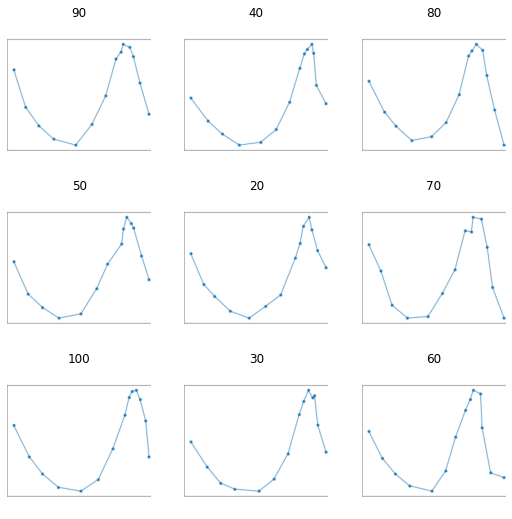

In [12]:
#create a dataloader that takes those files and applies the same transforms as the validation set with DataLoaders.test_dl:
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)
test_dl.show_batch(max_n=9)

In [13]:
test_dl.vocab

['10', '100', '20', '30', '40', '50', '60', '70', '80', '90']

In [14]:
test_image_for_CAM= test_fnames[8]

In [15]:
test_image_for_CAM

Path('../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_4005_60.png')

In [16]:
cat, tensor, probs = learn.predict(test_image_for_CAM)
print("Predicted SoC Label: " + cat)
print("Predicted: "+cat)
print("Predicted class index: " + str(tensor))

Predicted SoC Label: 60
Predicted: 60
Predicted class index: TensorBase(6)


In [17]:
# Check the model predictions
F.softmax(probs, dim=-1)

TensorBase([0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320, 0.0853, 0.0853,
        0.0853])

## CAM

In [18]:
# Update the custom hook to be a context manager
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)   
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    # Automatically register the hook when entering it
    def __enter__(self, *args): return self
    # Automatically remove the hook when exiting it
    def __exit__(self, *args): self.hook.remove()

In [19]:
img = PILImage.create(test_image_for_CAM)

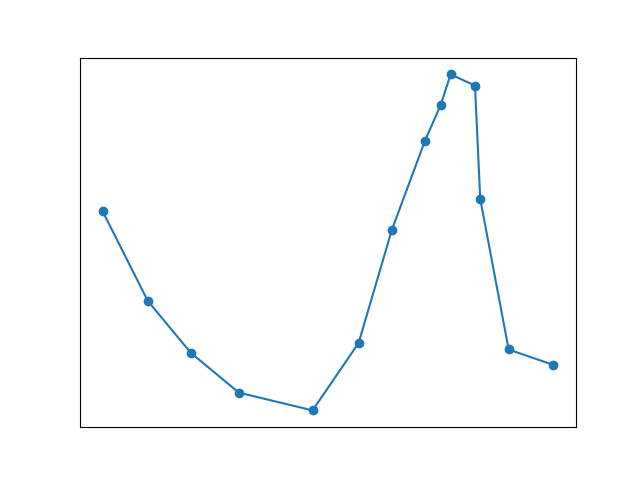

In [20]:
img

## Compute CAM Using FastAI DataLoader

In [21]:
def compute_CAM(learn,image_batch):
    # Pass the model to the `__enter__()` method for the Hook
    with Hook(learn.model[0]) as hook:
        with torch.no_grad(): output = learn.model.eval()(image_batch.cpu()) #x.cuda()/x.cpu()
        act = hook.stored
    # Perform inference on the test batch
    with torch.no_grad(): output = learn.model.eval()(image_batch.cpu())
    # Calculate the dot product the weight matrix for the last layer with the activations
    cam_map = torch.einsum('ck,kij->cij', learn.model[1][-1].weight, act[0])
    return cam_map

In [22]:
def show_cam_overlay(dl,cam_map,image_batch):
    # Get the first image from the test batch
    x_dec = TensorImage(dl.train.decode((image_batch,))[0][0])
    _,ax = plt.subplots()
    # Create a colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.magma)
    sm.set_clim(0, 1)
    cbar = plt.colorbar(sm, orientation="vertical")
    x_dec.show(ctx=ax)
    # Overlay the feature map for the cat class on top of the cat image
    ax.imshow(cam_map[1].detach().cpu(), alpha=0.6, extent=(0,224,224,0),
                  interpolation='bilinear', cmap='magma')

In [23]:
def show_CAM_for_image(learn, test_image_for_CAM):
    print("Processing :" + str(test_image_for_CAM))
    img = PILImage.create(test_image_for_CAM)
    dl = learn.dls
    # Get a batch of data from the test set using FastAI DataLoader 
    x, = first(dl.test_dl([img]))
    cam_map=compute_CAM(learn,x)
    show_cam_overlay(dl,cam_map,x)

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_4005_60.png


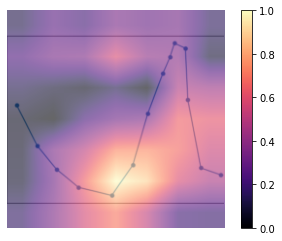

In [24]:
show_CAM_for_image(learn,test_image_for_CAM)

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_4003_90.png


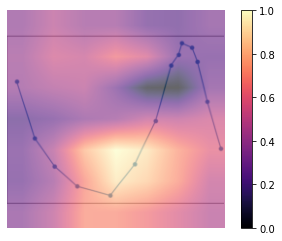

In [25]:
show_CAM_for_image(learn,test_fnames[0])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_8004_40.png


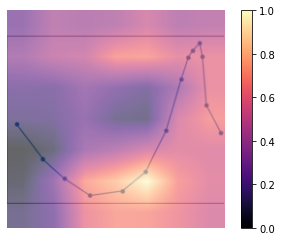

In [26]:
show_CAM_for_image(learn,test_fnames[1])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_5004_80.png


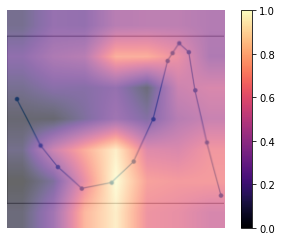

In [27]:
show_CAM_for_image(learn,test_fnames[2])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_9003_50.png


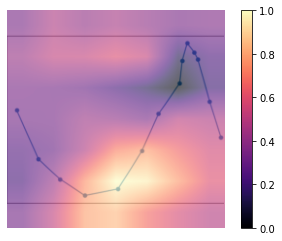

In [28]:
show_CAM_for_image(learn,test_fnames[3])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_6006_20.png


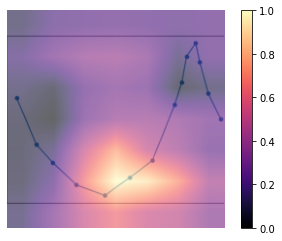

In [29]:
show_CAM_for_image(learn,test_fnames[4])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_5002_70.png


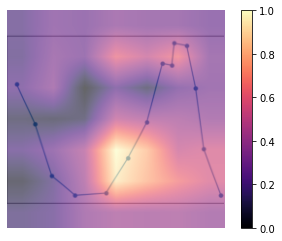

In [30]:
show_CAM_for_image(learn,test_fnames[5])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_5003_100.png


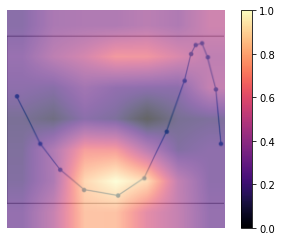

In [31]:
show_CAM_for_image(learn,test_fnames[6])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_7001_30.png


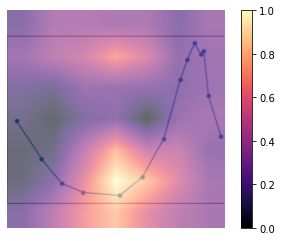

In [32]:
show_CAM_for_image(learn,test_fnames[7])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_4005_60.png


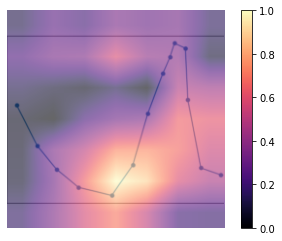

In [33]:
show_CAM_for_image(learn,test_fnames[8])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-02_9007_20.png


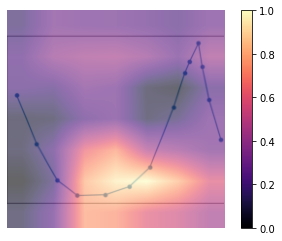

In [34]:
show_CAM_for_image(learn,test_fnames[9])

Processing :../data/images/Paper_MES_v2_leave_one_out_BATT05_Exp_1/Paper_MES_v2_leave_one_out_BATT05_Exp_1-03_7_60.png


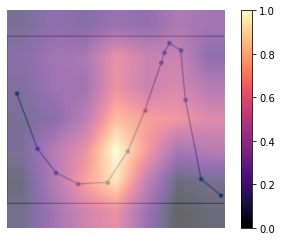

In [35]:
show_CAM_for_image(learn,test_fnames[10])